In [ ]:
# Install necessary packages in Colab or fresh environment
!pip install diffusers transformers accelerate
!pip install torch torchvision
!pip install matplotlib pillow tqdm



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvj

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from IPython.display import display
import random
import os
from tqdm import tqdm



In [ ]:

# Load pre-trained diffusion model
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe = pipe.to("cuda")

# Example prompt
prompt = "A cozy minimalist living room interior, natural light, Scandinavian style"
image = pipe(prompt).images[0]

# Display or save
image.save("sample_room.png")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

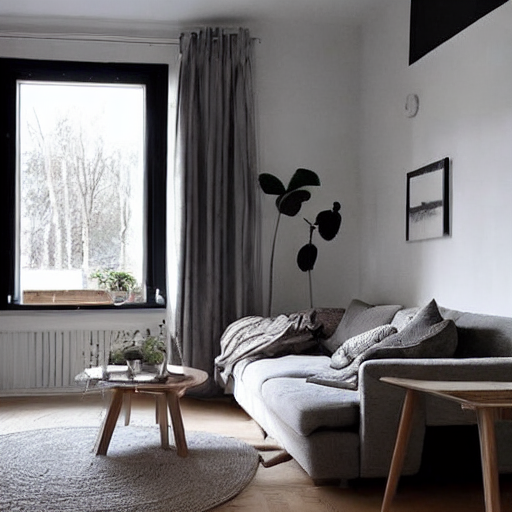

In [ ]:
# Display directly in notebook
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

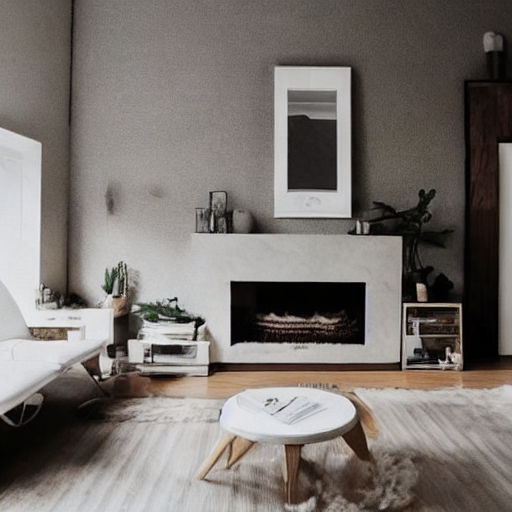

  0%|          | 0/50 [00:00<?, ?it/s]

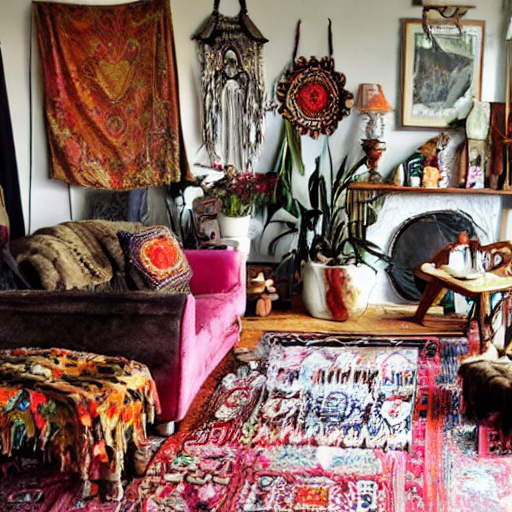

  0%|          | 0/50 [00:00<?, ?it/s]

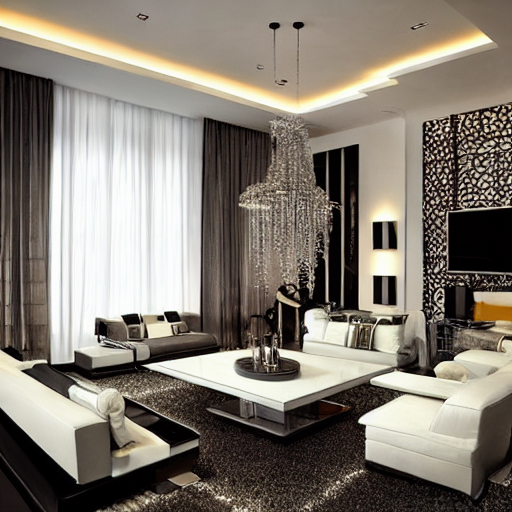

  0%|          | 0/50 [00:00<?, ?it/s]

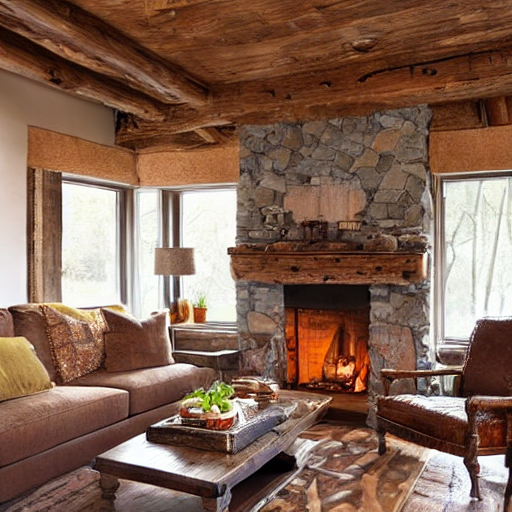

In [ ]:
prompts = [
    "A cozy minimalist living room",
    "A cluttered bohemian living room",
    "A modern luxurious living room",
    "A warm rustic living room"
]

# Generate images from each prompt
images = []
for p in prompts:
    img = pipe(p).images[0]
    img.save(f"{p.replace(' ', '_')}.png")
    display(img)  # Show each image in notebook
    images.append(img)


Generate ~50 prompts automatically

In [ ]:
styles = ["minimalist", "modern", "rustic", "bohemian", "luxurious", "industrial"]
feelings = ["cozy", "spacious", "bright", "warm", "inviting", "airy"]
elements = ["living room", "bedroom", "office", "kitchen"]

prompts = []
for _ in range(50):
    style = random.choice(styles)
    feeling = random.choice(feelings)
    element = random.choice(elements)
    prompt = f"A {feeling} {style} {element} interior design, natural light"
    prompts.append(prompt)

print(f"Generated {len(prompts)} prompts.")


Generated 50 prompts.


Generate and save images

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


Prompt: A warm luxurious living room interior design, natural light


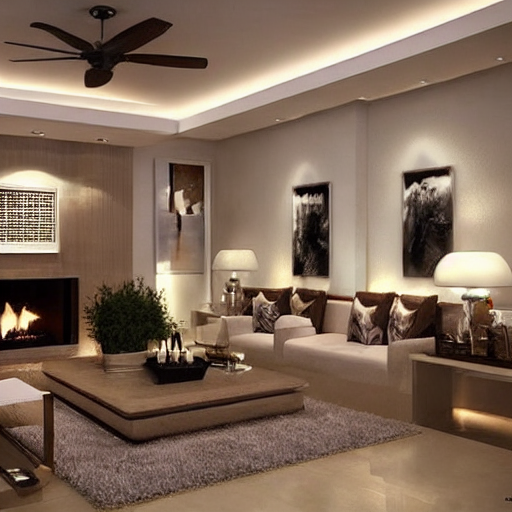

  2%|▏         | 1/50 [00:04<03:22,  4.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]


Prompt: A warm rustic bedroom interior design, natural light


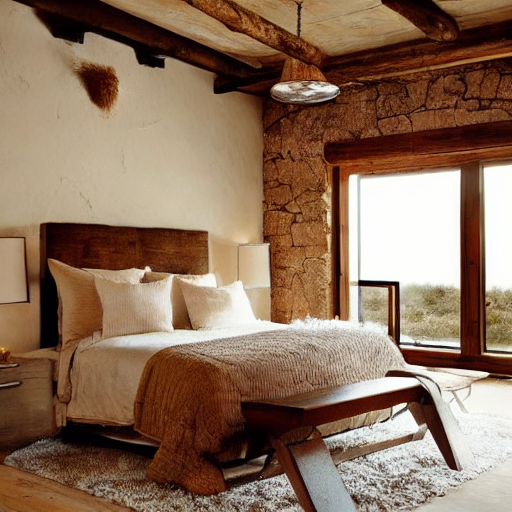

  4%|▍         | 2/50 [00:08<03:16,  4.10s/it]

  0%|          | 0/50 [00:00<?, ?it/s]


Prompt: A airy industrial living room interior design, natural light


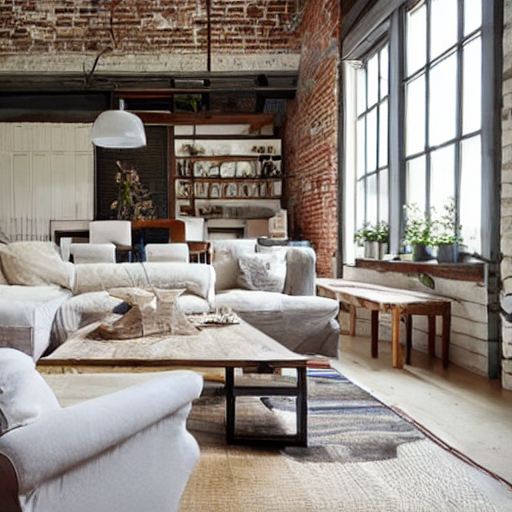

  6%|▌         | 3/50 [00:12<03:12,  4.09s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  8%|▊         | 4/50 [00:16<03:07,  4.08s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 10%|█         | 5/50 [00:20<03:03,  4.07s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 12%|█▏        | 6/50 [00:24<02:58,  4.06s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 14%|█▍        | 7/50 [00:28<02:53,  4.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 16%|█▌        | 8/50 [00:32<02:50,  4.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 18%|█▊        | 9/50 [00:36<02:45,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 20%|██        | 10/50 [00:40<02:41,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 22%|██▏       | 11/50 [00:44<02:37,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 24%|██▍       | 12/50 [00:48<02:33,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 26%|██▌       | 13/50 [00:52<02:29,  4.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 28%|██▊       | 14/50 [00:56<02:25,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 30%|███       | 15/50 [01:00<02:21,  4.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 32%|███▏      | 16/50 [01:04<02:17,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 34%|███▍      | 17/50 [01:08<02:13,  4.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 36%|███▌      | 18/50 [01:12<02:09,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 38%|███▊      | 19/50 [01:16<02:05,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 40%|████      | 20/50 [01:20<02:01,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 42%|████▏     | 21/50 [01:25<01:56,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 44%|████▍     | 22/50 [01:29<01:53,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 46%|████▌     | 23/50 [01:33<01:48,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 48%|████▊     | 24/50 [01:37<01:44,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 50%|█████     | 25/50 [01:41<01:40,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 52%|█████▏    | 26/50 [01:45<01:36,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 54%|█████▍    | 27/50 [01:49<01:32,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 56%|█████▌    | 28/50 [01:53<01:28,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 58%|█████▊    | 29/50 [01:57<01:24,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 60%|██████    | 30/50 [02:01<01:20,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 62%|██████▏   | 31/50 [02:05<01:16,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 64%|██████▍   | 32/50 [02:09<01:12,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 66%|██████▌   | 33/50 [02:13<01:08,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 68%|██████▊   | 34/50 [02:17<01:04,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 70%|███████   | 35/50 [02:21<01:00,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 72%|███████▏  | 36/50 [02:25<00:56,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 74%|███████▍  | 37/50 [02:29<00:52,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 76%|███████▌  | 38/50 [02:33<00:48,  4.02s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 78%|███████▊  | 39/50 [02:37<00:44,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 80%|████████  | 40/50 [02:41<00:40,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 82%|████████▏ | 41/50 [02:45<00:36,  4.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 84%|████████▍ | 42/50 [02:49<00:32,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 86%|████████▌ | 43/50 [02:53<00:28,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 88%|████████▊ | 44/50 [02:57<00:24,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 90%|█████████ | 45/50 [03:01<00:20,  4.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 92%|█████████▏| 46/50 [03:05<00:16,  4.05s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 94%|█████████▍| 47/50 [03:09<00:12,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 96%|█████████▌| 48/50 [03:13<00:08,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 98%|█████████▊| 49/50 [03:17<00:04,  4.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [03:22<00:00,  4.04s/it]


In [ ]:
os.makedirs("images", exist_ok=True)

for i, p in enumerate(tqdm(prompts)):
    img = pipe(p).images[0]
    img_path = f"images/image_{i}.png"
    img.save(img_path)
    if i < 3:  # Display first few examples
        print(f"\nPrompt: {p}")
        display(img)


Define interpretable aesthetic preference function

In [ ]:
def interpretable_aesthetic_score(prompt):
    score = 0
    explanation = []

    if "minimalist" in prompt:
        score += 2
        explanation.append("minimalist: +2 (clean, simple)")

    if "cozy" in prompt:
        score += 2
        explanation.append("cozy: +2 (inviting)")

    if "cluttered" in prompt:
        score -= 3
        explanation.append("cluttered: –3 (messy)")

    if "warm" in prompt:
        score += 1
        explanation.append("warm: +1 (welcoming)")

    if "luxurious" in prompt:
        score += 1
        explanation.append("luxurious: +1 (premium)")

    return score, explanation


Create preference pairs with explanations

In [ ]:
pairs = []
num_pairs = 100

for _ in range(num_pairs):
    idx_a, idx_b = random.sample(range(len(prompts)), 2)
    prompt_a = prompts[idx_a]
    prompt_b = prompts[idx_b]

    score_a, explanation_a = interpretable_aesthetic_score(prompt_a)
    score_b, explanation_b = interpretable_aesthetic_score(prompt_b)

    preferred = idx_a if score_a >= score_b else idx_b

    # Occasionally show explanations
    if random.random() < 0.05:
        print(f"\nPrompt A: {prompt_a}\nScore: {score_a}\nReasons: {', '.join(explanation_a)}")
        print(f"Prompt B: {prompt_b}\nScore: {score_b}\nReasons: {', '.join(explanation_b)}")
        print(f"Preferred: {'A' if preferred == idx_a else 'B'}")

    pairs.append((idx_a, idx_b, preferred))




Prompt A: A cozy modern bedroom interior design, natural light
Score: 2
Reasons: cozy: +2 (inviting)
Prompt B: A airy industrial living room interior design, natural light
Score: 0
Reasons: 
Preferred: A

Prompt A: A warm minimalist living room interior design, natural light
Score: 3
Reasons: minimalist: +2 (clean, simple), warm: +1 (welcoming)
Prompt B: A inviting industrial bedroom interior design, natural light
Score: 0
Reasons: 
Preferred: A

Prompt A: A bright luxurious kitchen interior design, natural light
Score: 1
Reasons: luxurious: +1 (premium)
Prompt B: A warm minimalist kitchen interior design, natural light
Score: 3
Reasons: minimalist: +2 (clean, simple), warm: +1 (welcoming)
Preferred: B

Prompt A: A warm modern office interior design, natural light
Score: 1
Reasons: warm: +1 (welcoming)
Prompt B: A warm minimalist living room interior design, natural light
Score: 3
Reasons: minimalist: +2 (clean, simple), warm: +1 (welcoming)
Preferred: B

Prompt A: A cozy minimalist k

Dataset and Transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


Preference Dataset

In [ ]:
class PreferenceDataset(Dataset):
    def __init__(self, pairs, prompts, transform):
        self.pairs = pairs
        self.prompts = prompts
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        idx_a, idx_b, preferred_idx = self.pairs[idx]
        img_a = Image.open(f"images/image_{idx_a}.png").convert("RGB")
        img_b = Image.open(f"images/image_{idx_b}.png").convert("RGB")
        img_a = self.transform(img_a)
        img_b = self.transform(img_b)
        label = 1 if preferred_idx == idx_a else 0
        return img_a, img_b, label


Load Datasets

In [ ]:
dataset = PreferenceDataset(pairs, prompts, transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


Reward Model

In [ ]:
feature_extractor = models.resnet18(pretrained=True)
feature_extractor.fc = nn.Identity()

# Enable all layers to be trained
for param in feature_extractor.parameters():
    param.requires_grad = True

reward_head = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

class RewardModel(nn.Module):
    def __init__(self, backbone, head):
        super().__init__()
        self.backbone = backbone
        self.head = head
    def forward(self, x):
        features = self.backbone(x)
        return self.head(features)

reward_model = RewardModel(feature_extractor, reward_head).cuda()
optimizer = optim.Adam(reward_model.parameters(), lr=1e-4)


Train Reward Model

In [ ]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for img_a, img_b, label in dataloader:
        img_a = img_a.cuda()
        img_b = img_b.cuda()
        label = label.cuda().float()

        score_a = reward_model(img_a).squeeze()
        score_b = reward_model(img_b).squeeze()

        pref_diff = score_a - score_b
        loss = torch.mean(torch.relu(1.0 - (pref_diff * (2 * label - 1))))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(dataloader):.4f}")



Epoch [1/10], Loss: 0.6707
Epoch [2/10], Loss: 0.3995
Epoch [3/10], Loss: 0.2609
Epoch [4/10], Loss: 0.2811
Epoch [5/10], Loss: 0.2570
Epoch [6/10], Loss: 0.3230
Epoch [7/10], Loss: 0.1707
Epoch [8/10], Loss: 0.1497
Epoch [9/10], Loss: 0.2136
Epoch [10/10], Loss: 0.1450


Score a few new images

Image 0 score: 0.18 — Prompt: A warm luxurious living room interior design, natural light


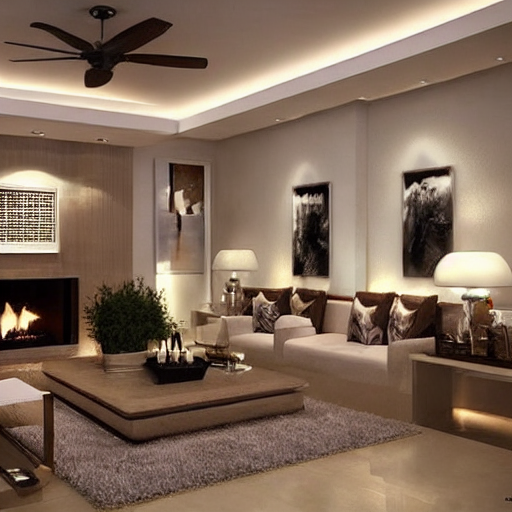

Image 1 score: 0.15 — Prompt: A warm rustic bedroom interior design, natural light


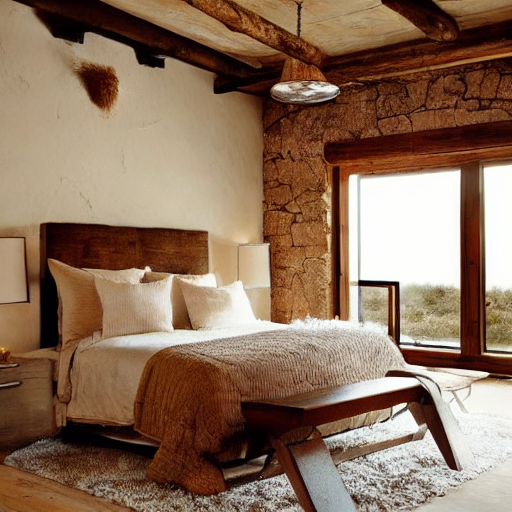

Image 2 score: 0.14 — Prompt: A airy industrial living room interior design, natural light


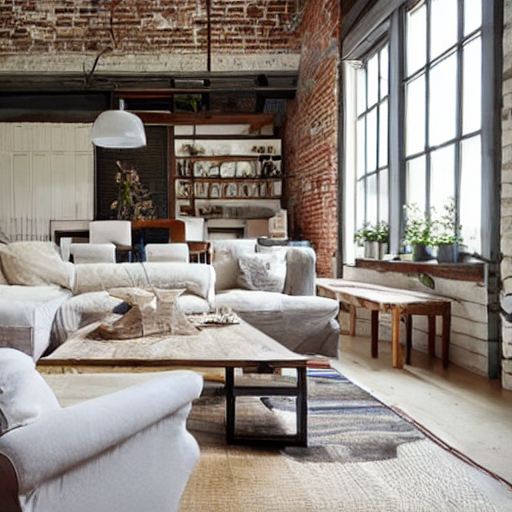

In [ ]:
for i in range(3):
    img = Image.open(f"images/image_{i}.png").convert("RGB")
    img_tensor = transform(img).unsqueeze(0).cuda()
    score = reward_model(img_tensor).item()
    print(f"Image {i} score: {score:.2f} — Prompt: {prompts[i]}")
    display(img)
